In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('data/crypto_1m.csv', index_col='unix')
df = df[-60*24*2:-60*24*1] # pick highest cointegrated pairs from t-24 hours

<AxesSubplot:>

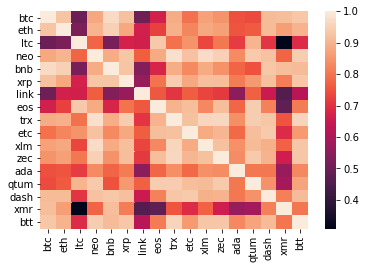

In [3]:
corr = df.corr()
sns.heatmap(corr)

In [4]:
n = corr.shape[0]
total_pairs = n**2 - n
total_pairs

272

In [5]:
def get_top_n_corr(corr, n):
    return corr.unstack().sort_values(ascending=False)[corr.shape[0]:corr.shape[0]+n*2][::2]
top_corr = get_top_n_corr(corr, 100)
top_corr

neo   trx     0.980298
xlm   neo     0.970960
btc   bnb     0.970253
zec   trx     0.964121
trx   xlm     0.960098
                ...   
neo   ltc     0.773781
xlm   xmr     0.773056
link  qtum    0.767968
neo   link    0.766648
etc   link    0.766410
Length: 100, dtype: float64

In [6]:
# Cointegration Test use ADF (test residual, reject H_0)
# Find the pair that has smallest pvalue

def adf(X, Y):
    ols_result=OLS(X, Y).fit()
    return (adfuller(ols_result.resid, autolag='AIC')[1])

In [7]:
p_values = []
for i, j in list(top_corr.axes[0]):
    pair = i + ' ' + j
    p_value = adf(df[i], df[j])
    p_values.append({'pair':pair, 'p_value':p_value})

In [9]:
pd.DataFrame(p_values).sort_values(by='p_value')

,pair,p_value
72,trx ada,0.000246
5,btt trx,0.000319
0,neo trx,0.000653
17,btt xrp,0.000748
92,ada eos,0.000955
...,...,...
60,eth xlm,0.739946
45,eth neo,0.815306
50,eth trx,0.834542
67,etc ltc,0.895001


In [14]:
# Note: Orders matter slightly !
print(adf(df['eth'], df['btc']))
print(adf(df['btc'], df['eth']))

0.9118984979019795
0.9119157137386411
